In [1]:
#    dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from urllib.error import HTTPError

#    data files to analyse
jhu_data = 'jhu_data.csv'
vacc_data = 'vaccine_data_global.csv'
pop_data = 'world_population.csv'

#   read the jhu dataset - csv file into a dataframe
jhu_df = pd.read_csv('jhu_data.csv')
jhu_df


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,11/2/2021 4:22,33.939110,67.709953,156284,7281,NaN,NaN,Afghanistan,401.465863,4.658826
1,NaN,NaN,NaN,Albania,11/2/2021 4:22,41.153300,20.168300,185497,2931,NaN,NaN,Albania,6445.791924,1.580079
2,NaN,NaN,NaN,Algeria,11/2/2021 4:22,28.033900,1.659600,206566,5924,NaN,NaN,Algeria,471.062912,2.867849
3,NaN,NaN,NaN,Andorra,11/2/2021 4:22,42.506300,1.521800,15516,130,NaN,NaN,Andorra,20081.537570,0.837845
4,NaN,NaN,NaN,Angola,11/2/2021 4:22,-11.202700,17.873900,64458,1713,NaN,NaN,Angola,196.122054,2.657544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120175,NaN,NaN,NaN,Vietnam,12/1/2021 4:22,14.058324,108.277199,1238082,25252,NaN,NaN,Vietnam,1271.933453,2.039606
120176,NaN,NaN,NaN,West Bank and Gaza,12/1/2021 4:22,31.952200,35.233200,460053,4796,NaN,NaN,West Bank and Gaza,9018.143198,1.042489
120177,NaN,NaN,NaN,Yemen,12/1/2021 4:22,15.552727,48.516388,10004,1950,NaN,NaN,Yemen,33.541242,19.492203
120178,NaN,NaN,NaN,Zambia,12/1/2021 4:22,-13.133897,27.849332,210169,3667,NaN,NaN,Zambia,1143.219664,1.744786


In [2]:
#   read the vaccination dataset - csv file into a dataframe
vacc_data_df = pd.read_csv('vaccine_data_global.csv')
vacc_data_df


,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,Afghanistan,12/16/2021,5.228706e+06,4.397449e+06,3.566192e+06,12/16/2021,4.0
1,NaN,Albania,12/16/2021,2.216402e+06,1.108572e+06,9.983260e+05,12/16/2021,8.0
2,NaN,Algeria,12/16/2021,1.229306e+07,6.875003e+06,5.391232e+06,12/16/2021,12.0
3,NaN,Andorra,12/16/2021,1.064280e+05,5.609500e+04,5.033300e+04,12/16/2021,20.0
4,NaN,Angola,12/16/2021,1.031955e+07,7.003795e+06,3.315757e+06,12/16/2021,24.0
...,...,...,...,...,...,...,...,...
627,NaN,West Bank and Gaza,12/16/2021,3.184868e+06,NaN,NaN,12/16/2021,275.0
628,NaN,World,12/16/2021,8.551439e+09,4.386355e+09,3.601249e+09,12/16/2021,NaN
629,NaN,Yemen,12/16/2021,7.860270e+05,5.566520e+05,3.665870e+05,12/16/2021,887.0
630,NaN,Zambia,12/16/2021,1.283096e+06,8.066110e+05,8.549790e+05,12/16/2021,894.0


In [3]:
#   read the world population dataset - csv file into a dataframe
pop_data_df = pd.read_csv('world_population.csv')
pop_data_df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [4]:
#   creat a data fram for the coutries of interest
countries_df = jhu_df[jhu_df['Country_Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
jhu_df.dropna(axis=1, how="all")
countries_df 

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
8,NaN,NaN,Australian Capital Territory,Australia,11/2/2021 4:22,-35.4735,149.0124,1788,13,NaN,NaN,"Australian Capital Territory, Australia",417.659425,0.727069
9,NaN,NaN,New South Wales,Australia,11/2/2021 4:22,-33.8688,151.2093,75578,576,NaN,NaN,"New South Wales, Australia",930.992855,0.762127
10,NaN,NaN,Northern Territory,Australia,11/2/2021 4:22,-12.4634,130.8456,225,0,NaN,NaN,"Northern Territory, Australia",91.612378,0.000000
11,NaN,NaN,Queensland,Australia,11/2/2021 4:22,-27.4698,153.0251,2090,7,NaN,NaN,"Queensland, Australia",40.856221,0.334928
12,NaN,NaN,South Australia,Australia,11/2/2021 4:22,-34.9285,138.6007,918,4,NaN,NaN,"South Australia, Australia",52.263023,0.435730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120166,NaN,NaN,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,12/1/2021 4:22,-7.9467,-14.3559,4,0,NaN,NaN,"Saint Helena, Ascension and Tristan da Cunha, ...",70.658894,0.000000
120167,NaN,NaN,Scotland,United Kingdom,12/1/2021 4:22,56.4907,-4.2026,727549,9572,NaN,NaN,"Scotland, United Kingdom",13317.024510,1.315650
120168,NaN,NaN,Turks and Caicos Islands,United Kingdom,12/1/2021 4:22,21.6940,-71.7979,3096,24,NaN,NaN,"Turks and Caicos Islands, United Kingdom",7996.280800,0.775194
120169,NaN,NaN,Unknown,United Kingdom,12/1/2021 4:22,NaN,NaN,0,0,NaN,NaN,"Unknown, United Kingdom",NaN,NaN


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#print(final_csv_file)
#final_csv_file.to_csv('jhu_data.csv', index=False)


#Research Questions:
#What is the relationship between “unvaccinated” Covid patients versus “vaccinated” Covid patients for the following categories in selected countries?	Pie chart vaccinated vs unvaccinated	Erika
#Vaccination rates per country		Bar chart?				Erika
#Total Covid cases			Bar chart?				Erika
#Total Covid hospitalisations		Bar chart?				John
#Total covid cases recovered		Bar chart?				John
#Total Covid deaths			Bar chart with 3-bars			John
#Mortality rates per 100,000 population	Bar chart with 3-bars			Mike
#Mortality rates – case / fatality ratio 	Bar chart with 3-bars			Mike
#Regression analysis goes here after charting						Mike
#What countries / areas will be most impacted	 
#What countries / areas will be least impacted?
#Optional - What will be the impact of the spread of Covid-19 for mental health trends?
#Source datasets from ABS. Oz Health

Country_Region
Australia         9.991261e+04
Brazil            9.650690e+06
Israel            4.636041e+05
Italy             5.057224e+06
New Zealand       5.886673e+03
South Africa      1.484085e+05
US                1.460918e+09
United Kingdom    4.277304e+06
Name: Incident_Rate, dtype: float64

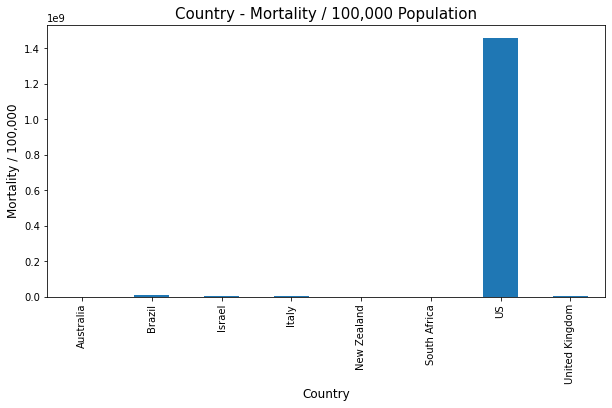

In [6]:
#   plot mortality per 100,000 population for countries of interest
mortality100k = countries_df.groupby(["Country_Region"]).sum()["Incident_Rate"]
Bar_Pandas = mortality100k.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality / 100,000", fontsize=12)
plt.title("Country - Mortality / 100,000 Population", fontsize=15)
mortality100k

Country_Region
Australia            290.445961
Brazil              2007.767649
Israel                18.277137
Italy               1661.397793
New Zealand           11.785848
South Africa          91.525897
US                290373.879635
United Kingdom       437.528521
Name: Case_Fatality_Ratio, dtype: float64

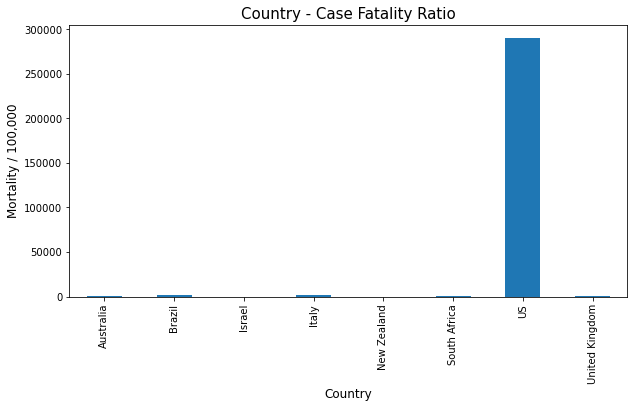

In [7]:
#   plot case / mortality ratio for countries of interest
case_mortality = countries_df.groupby(["Country_Region"]).sum()["Case_Fatality_Ratio"]
Bar_Pandas = case_mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality / 100,000", fontsize=12)
plt.title("Country - Case Fatality Ratio", fontsize=15)
case_mortality

In [8]:
#   calculate stats for incident rate for entire jhu data set 

means = jhu_df.groupby('Country_Region').mean()['Incident_Rate']

medians = jhu_df.groupby('Country_Region').median()['Incident_Rate']

variances = jhu_df.groupby('Country_Region').var()['Incident_Rate']

std_devs = jhu_df.groupby('Country_Region').std()['Incident_Rate']

std_err_meas = jhu_df.groupby('Country_Region').sem()['Incident_Rate']

ir_summary_stats_table = pd.DataFrame({"Mean Incident Rate":means,
                              "Median Incident Rate":medians,
                              "Variance Incident Rate":variances,
                              "Std. Dev. Incident Rate":std_devs ,
                              "Std. Err. Incident Rate":std_err_meas})
ir_summary_stats_table

,Mean Incident Rate,Median Incident Rate,Variance Incident Rate,Std. Dev. Incident Rate,Std. Err. Incident Rate
Country_Region,,,,,
Afghanistan,402.552903,402.353391,0.733145,0.856239,0.156327
Albania,6719.824171,6726.058100,24272.358264,155.795887,28.444307
Algeria,475.055823,474.731012,7.467661,2.732702,0.498921
Andorra,20757.134538,20601.824890,323787.814272,569.023562,103.889014
Angola,197.436371,197.547528,0.423833,0.651025,0.118860
...,...,...,...,...,...
Vietnam,1086.149364,1068.710339,9626.188386,98.113141,17.912927
West Bank and Gaza,8961.004814,8963.628922,1303.003663,36.097142,6.590406
Yemen,33.260055,33.313252,0.039797,0.199491,0.036422


In [9]:
#   calculate stats for case fatality ratio for entire jhu data set 

means = jhu_df.groupby('Country_Region').mean()['Case_Fatality_Ratio']

medians = jhu_df.groupby('Country_Region').median()['Case_Fatality_Ratio']

variances = jhu_df.groupby('Country_Region').var()['Case_Fatality_Ratio']

std_devs = jhu_df.groupby('Country_Region').std()['Case_Fatality_Ratio']

std_err_meas = jhu_df.groupby('Country_Region').sem()['Case_Fatality_Ratio']

cfr_summary_stats_table = pd.DataFrame({"Mean Case Fatality Ratio":means,
                              "Median Case Fatality Ratio":medians,
                              "Variance Case Fatality Ratio":variances,
                              "Std. Dev. Case Fatality Ratio":std_devs ,
                              "Std. Err. Case Fatality Ratio":std_err_meas})
cfr_summary_stats_table


,Mean Case Fatality Ratio,Median Case Fatality Ratio,Variance Case Fatality Ratio,Std. Dev. Case Fatality Ratio,Std. Err. Case Fatality Ratio
Country_Region,,,,,
Afghanistan,4.655528,4.657143,1.927145e-05,0.004390,0.000801
Albania,1.555995,1.550100,1.027142e-04,0.010135,0.001850
Algeria,2.876725,2.879315,3.270373e-05,0.005719,0.001044
Andorra,0.812549,0.816686,3.869035e-04,0.019670,0.003591
Angola,2.659937,2.660224,1.391033e-06,0.001179,0.000215
...,...,...,...,...,...
Vietnam,2.222117,2.232777,1.230460e-02,0.110926,0.020252
West Bank and Gaza,1.038884,1.040409,1.398287e-05,0.003739,0.000683
Yemen,19.406988,19.388990,4.104177e-03,0.064064,0.011696


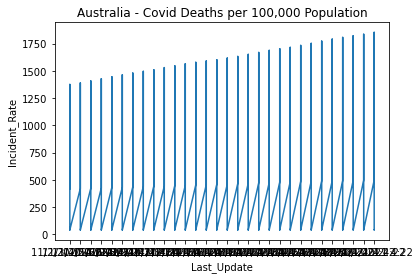

In [10]:
#    generate a line plot of deaths per 100,000 population (Incident_Rate) vs. date (Last_Update) for Australia
ir_australia = countries_df.loc[jhu_df['Country_Region'] == "Australia"]
ir_australia_data = ir_australia.loc[ir_australia['Country_Region'] == 'Australia']
plt.plot(ir_australia_data['Last_Update'],ir_australia_data['Incident_Rate'])
plt.xlabel('Last_Update')
plt.ylabel('Incident_Rate')
plt.title('Australia - Covid Deaths per 100,000 Population')
plt.show()



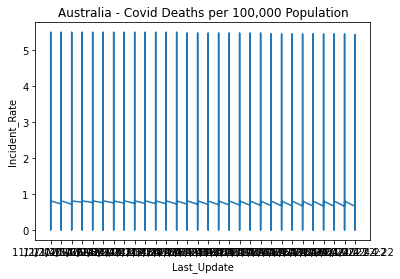

In [11]:
#    generate a line plot of case / fatality ratio for Australia
ir_australia = countries_df.loc[jhu_df['Country_Region'] == "Australia"]
ir_australia_data = ir_australia.loc[ir_australia['Country_Region'] == 'Australia']
plt.plot(ir_australia_data['Last_Update'],ir_australia_data['Case_Fatality_Ratio'])
plt.xlabel('Last_Update')
plt.ylabel('Incident_Rate')
plt.title('Australia - Covid Deaths per 100,000 Population')
plt.show()


In [16]:
#   determine outliers using quartiles, upper and lower bounds...........CANNOT GET THIS TO WORK

#    create list for the countries of interest
countries_list = ["Australia", "US", "United Kingdom", "New Zealand", "Italy", "Israel", "Brazil", "South Africa"]

#   calculate quartiles, upper & lower bounds and determine of there are outliers
quartiles = countries_df.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = countries_df.loc[(incident_rate < lower_bound) | (incident_rate > upper_bound)]
print(f"Potential outliers: {outliers}")



KeyError: 0.25

ValueError: Dimensions of labels and X must be compatible

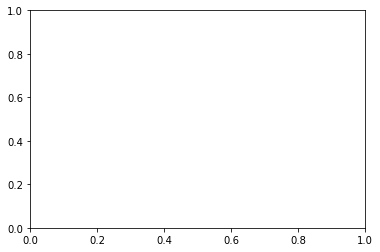

In [17]:
# Generate a box plot of deaths per 100,000 population for countries of interest data set...........CANNOT GET THIS TO WORK
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(countries_df, labels = countries_list, flierprops=orange_out)
plt.ylabel('Deaths per 100,000 Population')
plt.show()